# Trabajo Práctico 2

## Redes Neuronales
## Alumno: Julián Stejman


El objetivo de este trabajo es implementar y analizar distintos modelos de aprendizaje profundo aplicados a problemas clásicos de redes neuronales. Se evalúan perceptrones simples y multicapa, RBM’s, redes neuronales convolucionales y autoencoders. 


1. Implemente un perceptrón simple que aprenda la función lógica AND y la función
lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el
entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos
los vectores de entrada de la red

Para este ejercicio se escribe la clase de un perceptrón simple que aprende la función lógica AND y la función lógica OR, de 2 y 4 entradas. Luego se evalúa el período de entrenamiento y se grafica la recta discriminadora y todos los vectores de entrada de la red.

In [7]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return
 
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 para el término de sesgo
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.errors = []  # Lista para almacenar el error por época
    
    def activation_function(self, x):
        return 1 if x > 0 else -1
    
    def predict(self, x):
        # Insertamos el bias en la entrada x y calculamos la salida z
        z = np.dot(self.weights.T, np.insert(x, 0, 1))  # Insertamos 1 para el término de sesgo
        return self.activation_function(z)
    
    def ECM(self, yd, y_pred):
        # Calcula el error cuadrático medio para la época
        error = sum((yd - y_pred) ** 2 for yd, y_pred in zip(yd, y_pred)) / len(yd)
        return error

    def fit(self, X, y, plot_graph=True):
        for epoch in range(self.epochs):
            indexes = np.random.permutation(len(y))
            for index in indexes:
                # Predicción para cada ejemplo
                prediction = self.predict(X[index])
                # Ajuste de pesos
                self.weights[1:] += self.learning_rate * (y[index] - prediction) * X[index]
                self.weights[0] += self.learning_rate * (y[index] - prediction)  # Sesgo o bias
            
            # Predicciones para todo el conjunto X después de la actualización
            y_pred = [self.predict(xi) for xi in X]
            # Cálculo del error para la época
            error_epoch = self.ECM(y, y_pred)
            self.errors.append(error_epoch)
            
            # Condición de parada si el error es 0
            if error_epoch == 0:
                break

        # Graficar si plot_graph es True
        if plot_graph:
            plt.plot(range(1, len(self.errors) + 1), self.errors, 'ro-')
            plt.xlabel('Época')
            plt.ylabel('Error')
            plt.title('Error vs Época')
            plt.show()

    def fit_nograph(self, X, y):
        # Llamada a fit con plot_graph=False para evitar la gráfica
        self.fit(X, y, plot_graph=False)     


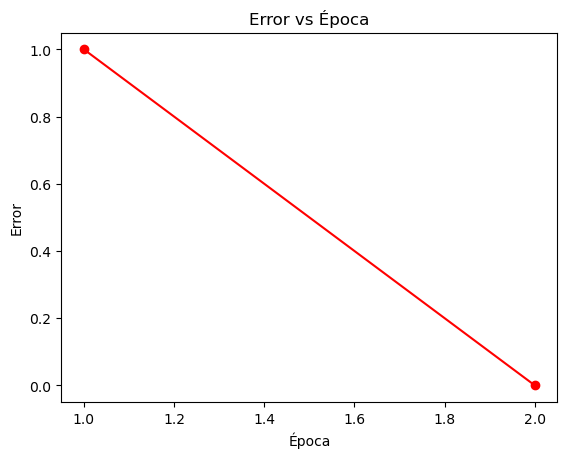

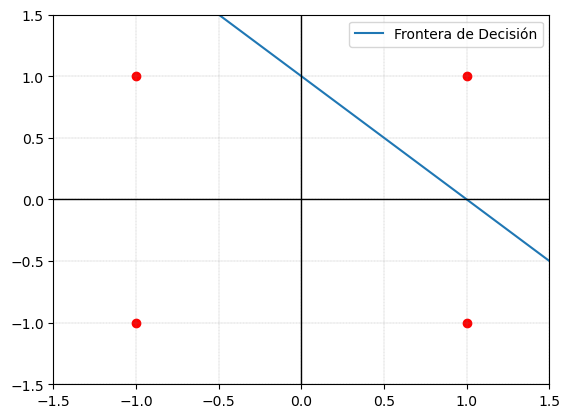

In [8]:
x_and = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])
perceptron_and = Perceptron(2)
perceptron_and.fit(x_and, y_and)
plt.figure()
plt.scatter(x_and[:, 0], x_and[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_and.weights[1] * x_values + perceptron_and.weights[0]) / perceptron_and.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

Se puede ver que el perceptrón simple aprende la función lógica AND y la frontera de decisión es una recta que separa los puntos de las dos clases. Se ve que para los valores -1 y -1 la salida es -1, para los valores -1 y 1 la salida es -1, para los valores 1 y -1 la salida es -1 y para los valores 1 y 1 la salida es 1. Esto coincide con lo que se espera de la función lógica AND.

Para algunas ejecuciones del código aparenta como si en la primera época ya tiene error 0, y es justamente el caso, no necesariamente tiene que pasar por todas las épocas para aprender la función lógica.

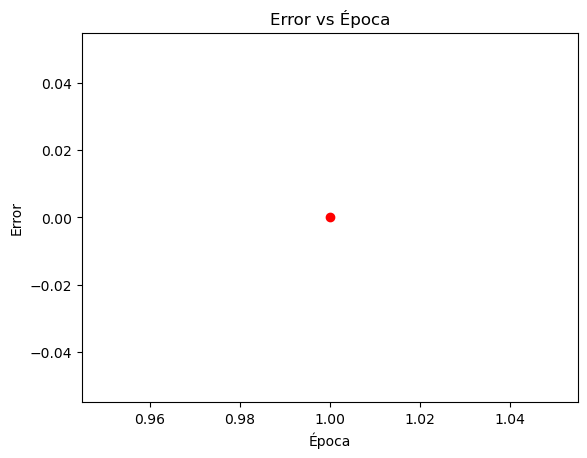

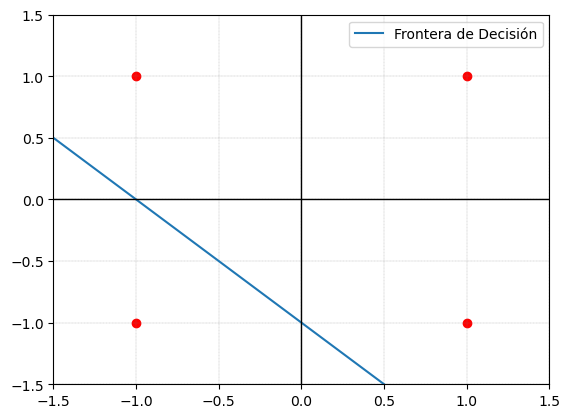

In [9]:
x_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])
perceptron_or = Perceptron(2)
perceptron_or.fit(x_or, y_or)
plt.figure()
plt.scatter(x_or[:, 0], x_or[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_or.weights[1] * x_values + perceptron_or.weights[0]) / perceptron_or.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()




Aquí se puede ver algo similar, que es que el perceptrón simple aprende la función lógica OR y la frontera de decisión es una recta que separa los puntos de las dos clases. Se ve que para los valores -1 y -1 la salida es -1, para los valores -1 y 1 la salida es 1, para los valores 1 y -1 la salida es 1 y para los valores 1 y 1 la salida es 1. Esto coincide con lo que se espera de la función lógica OR. 

Se vuelve a evaluar estas funciones lógicas pero en vez de hacerlas con 2 entradas, se hace con 4. Lógicamente no hay una manera clara de hacer un gráfico de 4 dimensiones pero sí se puede evaluar la salida y confirmar que es correcta, y además se puede ver la evolución del error durante el entrenamiento.

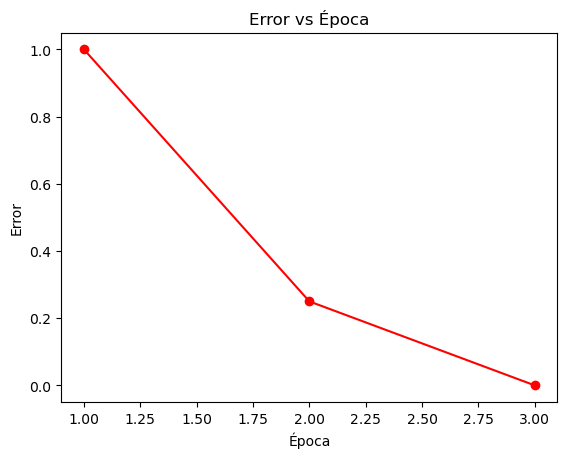

1
-1


In [10]:
import itertools

permutations = list(itertools.product([True, False], repeat=4))
y4_and = []
for p in permutations:
    if p[0] and p[1] and p[2] and p[3]:
        y4_and.append(1)
    else:
        y4_and.append(-1)

x4_and = np.array(permutations)
x4_and = np.where(x4_and, 1, -1)

perceptron_4_and = Perceptron(4)
perceptron_4_and.fit(x4_and, y4_and)
print(perceptron_4_and.predict([1, 1, 1, 1]))
print(perceptron_4_and.predict([1, 1, 1, -1]))



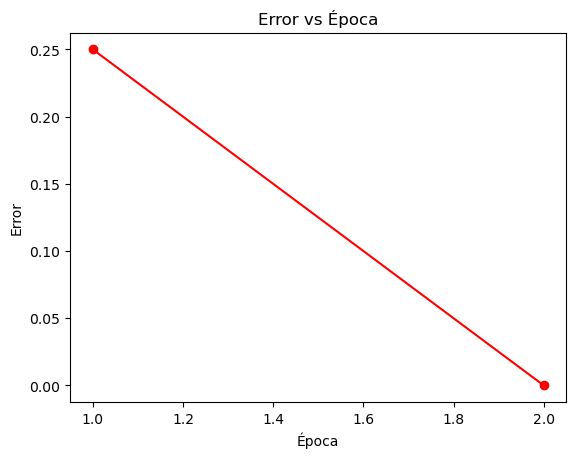

In [11]:
x4_or = x4_and.copy()
y4_or = []
for p in permutations:
    if p[0] or p[1] or p[2] or p[3]:
        y4_or.append(1)
    else:
        y4_or.append(-1)

perceptron_4_or = Perceptron(4)
perceptron_4_or.fit(x4_or, y4_or)



2) Determine numéricamente cómo varía la capacidad del perceptrón simple en función
del número de patrones enseñados.

Para determinar esto lo que se hace es entrenar el perceptrón simple con un número creciente de patrones, en este caso son valores aleatorios entre -1 y 1 con resultados elegidos aleatoriamente entre el número 1 y -1. Se define una cantidad de patrones máximas a entrenar para después definir una tasa de aprendizaje, que será la cantidad de patrones correctamente aprendidos sobre la cantidad de patrones totales. Se grafica la tasa de aprendizaje en función de la cantidad de patrones enseñados. 

In [12]:
%%skip
dims = [5, 10, 15, 20, 25]
Np = 60
Ntot = 80
maxEpochs = 100
jump = 5
naps = []
for patDim in dims:
    Nap = np.zeros(Np)
    for i in range(1, Np, jump):
        for n in range(Ntot):
            patterns = np.random.uniform(-1, 1, (i, patDim))
            yd = np.random.choice([-1, 1], i)
            perceptron = Perceptron(patDim)
            for epoch in range(maxEpochs):
                if perceptron.ECM(yd, [perceptron.predict(xi) for xi in patterns]) == 0:
                    Nap[i//jump]+=1
                    break
                perceptron.fit_nograph(patterns, yd)
    naps.append(Nap)                

In [13]:
%%skip
x_range = np.arange(0, jump * Np, jump)
for i in range(len(dims)):
    plt.plot(x_range, naps[i] / Ntot,label=f'N = {dims[i]}')

plt.xlim(0, Np+10)
plt.axhline(y= 0.5, color='r', linestyle='--', linewidth = 0.7)   
plt.xlabel('Cantidad de patrones')
plt.ylabel('Tasa de aprendizaje')
plt.title('Capacidad del Perceptrón')
plt.legend()
plt.show()



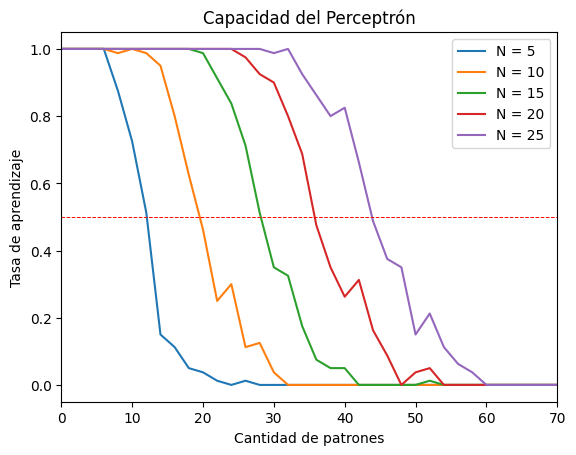

Esto va en línea con lo que se espera de la capacidad del perceptrón simple, que es que a medida que se le enseñan más patrones, la capacidad de generalización del perceptrón simple disminuye. Sigue el recorrido de una curva sigmoidea y llega aproximadamente a la mitad de su tasa de aprendizaje en 2*dimensión.

3. Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4
entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre
cómo evoluciona el error durante el entrenamiento

Para este ejercicio se escribe la clase de un perceptrón multicapa que aprende la función lógica XOR de 2 y de 4 entradas. Puntualmente se utiliza un perceptrón multicapa dado que no se puede resolver con un perceptrón simple porque no es un problema linealmente separable. Se utiliza el algoritmo de backpropagation, que compara la salida de la red con una salida deseada y actualiza los pesos sinápticos desde el final hasta el principio. Se muestra cómo evoluciona el error durante el entrenamiento y las predicciones que toma luego de haber recorrido por determinadas épocas hasta disminuir el error.



In [14]:
class Perceptron2:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        # El peso incluye +1 para el término de sesgo
        self.weights = np.random.randn(input_size + 1)  
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation_function(self, x):
        return np.tanh(x)  # Función de activación tanh
    
    def activation_function_derivative(self, x):
        return 1 - np.tanh(x) ** 2  # Derivada de tanh
    
    def predict(self, x):
        # Agregamos el sesgo en la entrada
        x = np.insert(x, 0, 1)  
        z = np.dot(self.weights, x) 
        return self.activation_function(z)
    
    def update_weights(self, x, error):
        # Agregamos el sesgo en la entrada
        x = np.insert(x, 0, 1)  
        self.weights += self.learning_rate * error * x

class MultiLayerPerceptron:
    def __init__(self, layer_sizes, learning_rate=0.1, epochs=1000):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []
        self.biases = []
        self.errors = []
        self.test_errors = []
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            weight = np.random.randn(self.layer_sizes[i], self.layer_sizes[i + 1])
            bias = np.random.randn(self.layer_sizes[i + 1])
            self.weights.append(weight)
            self.biases.append(bias)


    def fit(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                self.update_weights(xi, target)
    def fit_with_graph(self, X, y, min_error=0.002):  
        for _ in range(self.epochs):
            error_epoch = 0
            
            for xi, target in zip(X, y):
                self.update_weights(xi, target)
                y_pred = self.predict(xi)
                
                error_epoch += np.sum((target - y_pred) ** 2)
                
            self.errors.append(error_epoch / len(y))
            
            if error_epoch / len(y) < min_error:
                break
        plt.plot(self.errors, label='Training Error')
        
        plt.xlabel('Epochs')
        plt.ylabel('Total Error')
        plt.title('Error vs. Epochs')
        plt.legend()
        plt.show()                    
    def fit_with_graph_vs_test(self, X, y, X_test, y_test, min_error=0.002, batch_size = 1):  
        for _ in range(self.epochs):
            for start in range (0, len(y), batch_size):
                x_batch = X[start:start+batch_size]
                y_batch = y[start:start+batch_size]

                error_epoch = 0
                error_test_epoch = 0
                for xi, target, xt, test_target in zip(x_batch, y_batch, X_test, y_test):
                    self.update_weights(xi, target)
                    y_pred = self.predict(xi)
                    y_pred_test = self.predict(xt)
                    error_epoch += np.sum((target - y_pred) ** 2)
                    error_test_epoch += np.sum((test_target - y_pred_test) ** 2)
            self.errors.append(error_epoch / len(y))
            self.test_errors.append(error_test_epoch / len(y_test))
            if error_epoch / len(y_test) < min_error:
                break
        plt.plot(self.errors, label='Training Error')
        plt.plot(self.test_errors, label='Test Error')
        plt.xlabel('Epochs')
        plt.ylabel('Total Error')
        plt.title('Error vs. Epochs')
        plt.legend()
        plt.show()

    def update_weights(self, xi, target):
        activations = [xi]
        inputs = xi
        # Colecciono las activaciones de las capas
        for weight, bias in zip(self.weights, self.biases):
            inputs = np.dot(inputs, weight) + bias
            inputs = np.tanh(inputs)
            activations.append(inputs)

        # Backpropagation
        error = target - activations[-1]
        deltas = [error * (1 - activations[-1] ** 2)]

        for i in range(len(self.weights) - 2, -1, -1):
            delta = np.dot(deltas[-1], self.weights[i + 1].T) * (1 - activations[i + 1] ** 2)
            deltas.append(delta)

        deltas.reverse()

        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * np.outer(activations[i], deltas[i])
            self.biases[i] += self.learning_rate * deltas[i]


    def predict(self, X):
        inputs = X
        for i, (weight, bias) in enumerate(zip(self.weights, self.biases)):
            inputs = np.dot(inputs, weight) + bias
            if i < len(self.weights) - 1:
                inputs = np.tanh(inputs)  # tanh para capas ocultas
            # salida sin función de activación para la capa de salida
        return inputs

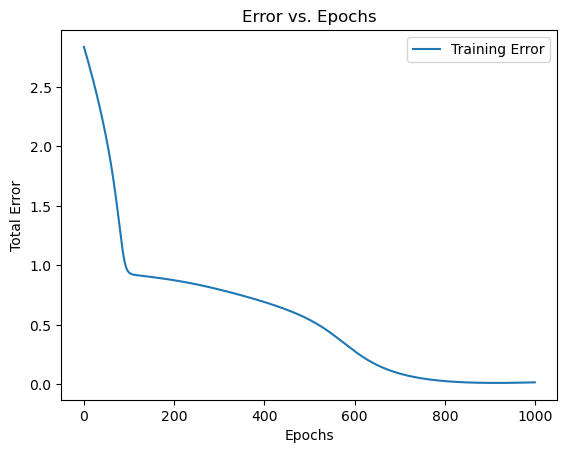

Entrada: [0 0], Predicción: -1
Entrada: [0 1], Predicción: 1
Entrada: [1 0], Predicción: 1
Entrada: [1 1], Predicción: -1


In [15]:

# Configuración para XOR de 2 entradas
mlp = MultiLayerPerceptron(layer_sizes=[2,4,10,2,1], learning_rate=0.002, epochs=1000)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas XOR
y = np.array([-1, 1, 1, -1])  # Salidas XOR deseadas (para tanh)

# Entrenamiento y evaluación
mlp.fit_with_graph(X, y)

# Predicciones después del entrenamiento
for x in X:
    prediction = mlp.predict(x)
    rounded_prediction = 1 if prediction >= 0 else -1
    print(f"Entrada: {x}, Predicción: {rounded_prediction}")

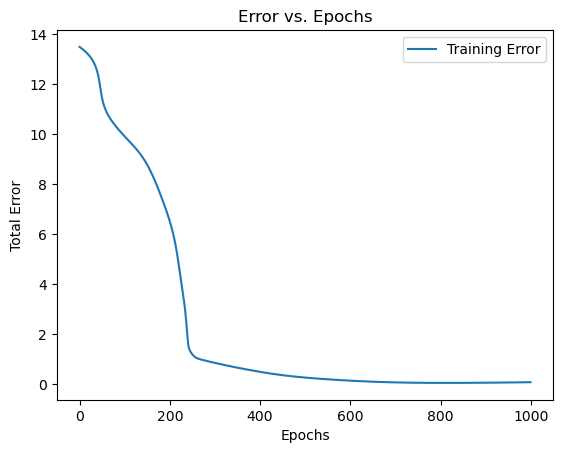

Entrada: [0 0 0 0], Predicción: -1
Entrada: [0 0 0 1], Predicción: 1
Entrada: [0 0 1 0], Predicción: 1
Entrada: [0 0 1 1], Predicción: -1
Entrada: [0 1 0 0], Predicción: 1
Entrada: [0 1 0 1], Predicción: -1
Entrada: [0 1 1 0], Predicción: -1
Entrada: [0 1 1 1], Predicción: 1
Entrada: [1 0 0 0], Predicción: 1
Entrada: [1 0 0 1], Predicción: -1
Entrada: [1 0 1 0], Predicción: -1
Entrada: [1 0 1 1], Predicción: 1
Entrada: [1 1 0 0], Predicción: -1
Entrada: [1 1 0 1], Predicción: 1
Entrada: [1 1 1 0], Predicción: 1
Entrada: [1 1 1 1], Predicción: -1


In [16]:
# Configuración para XOR de 4 entradas
mlp2 = MultiLayerPerceptron(layer_sizes=[4,4,10,5,1], learning_rate=0.002, epochs=1000)
X2 = np.array([[0, 0, 0, 0], 
               [0, 0, 0, 1], 
               [0, 0, 1, 0], 
               [0, 0, 1, 1], 
               [0, 1, 0, 0], 
               [0, 1, 0, 1], 
               [0, 1, 1, 0], 
               [0, 1, 1, 1], 
               [1, 0, 0, 0], 
               [1, 0, 0, 1], 
               [1, 0, 1, 0], 
               [1, 0, 1, 1], 
               [1, 1, 0, 0], 
               [1, 1, 0, 1], 
               [1, 1, 1, 0], 
               [1, 1, 1, 1]])  # Entradas XOR
y2 = np.array([-1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1])  # Salidas XOR deseadas (para tanh)

mlp2.fit_with_graph(X2, y2)

for x2 in X2:
    prediction2 = mlp2.predict(x2)
    rounded_prediction2 = 1 if prediction2 >= 0 else -1
    print(f"Entrada: {x2}, Predicción: {rounded_prediction2}")

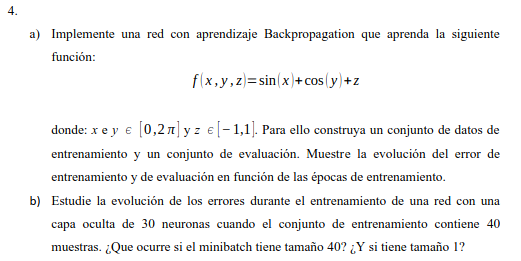

<!--[image.png](attachment:image.png)-->


Utilizando los mismos perceptrones multicapa, le iremos a pasar 3 valores de entrada que corresponden a las variables "x" "y" y "z", para tener una salida escalar o sea de dimensión 1. Se le dará 0.2 de todo el conjunto de datos para testeo y el resto para entrenamiento. Se graficará el error en función de las épocas y se graficará la salida deseada vs la salida obtenida.

In [17]:

prop_test = 0.2
cantidad_vectores = 500
def funcion_especifica(coords):
    return np.sin(coords[0]) + np.cos(coords[1]) + coords[2]


vectores_train = np.array([[np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(-1, 1)] for _ in range(int(cantidad_vectores*(1-prop_test)))])
vectores_test = np.array([[np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(-1, 1)] for _ in range(int(cantidad_vectores*prop_test))])

y_train = np.array([funcion_especifica(v) for v in vectores_train])
y_test = np.array([funcion_especifica(v) for v in vectores_test])


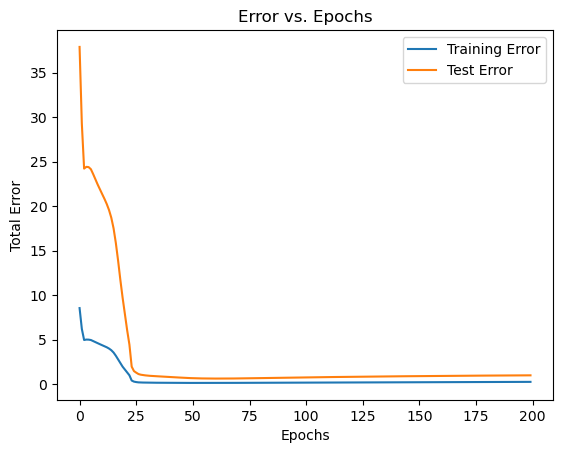

In [18]:
mlp3 = MultiLayerPerceptron(layer_sizes=[3, 30, 1], learning_rate=0.005, epochs=200)
mlp3.fit_with_graph_vs_test(vectores_train, y_train, vectores_test, y_test, batch_size=cantidad_vectores, min_error=0)

Se puede ver como el error de entrenamiento se mantiene abajo del error de testeo y también sucede que el error de testeo hasta puede incrementar. Esto es porque el modelo se está ajustando a los datos de entrenamiento y no necesariamente a los datos de testeo y por eso puede haber un incremento en el error de testeo.

Si se elige cambiar el tamaño de batch a 40, deja de usar el conjunto completo para entrenar y lo separa a 40 datos por batch. Se puede ver que el error de entrenamiento y el error de testeo se mantienen más estables y no hay un incremento en el error de testeo. Además, andan en órdenes de magnitud menores que en el caso anterior.

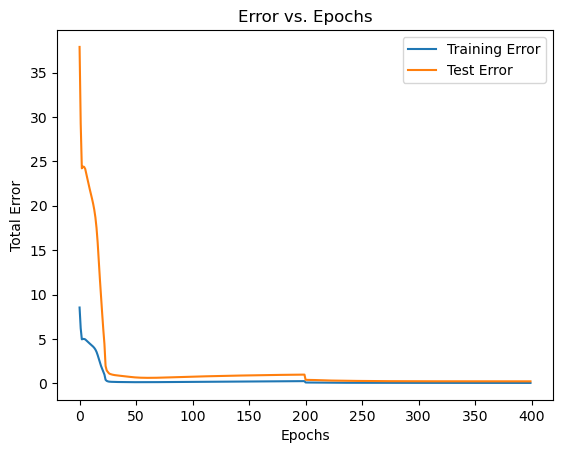

In [19]:

mlp3.fit_with_graph_vs_test(vectores_train, y_train, vectores_test, y_test, min_error=0, batch_size= 40)


Con un batch size de 1 el error de entrenamiento y testeo baja sustancialmente pero no se puede decir que se mantiene estable. Cada vez que se ejecuta el código se obtienen resultados distintos, pero en general se puede ver que el error de entrenamiento y testeo es menor que en los casos anteriores. En promedio el error de testeo es menor que en los casos anteriores entonces claramente está aprendiendo más de los resultados pero puede ser que no esté generalizando bien, o sea, que estuviera haciendo "overfitting". 

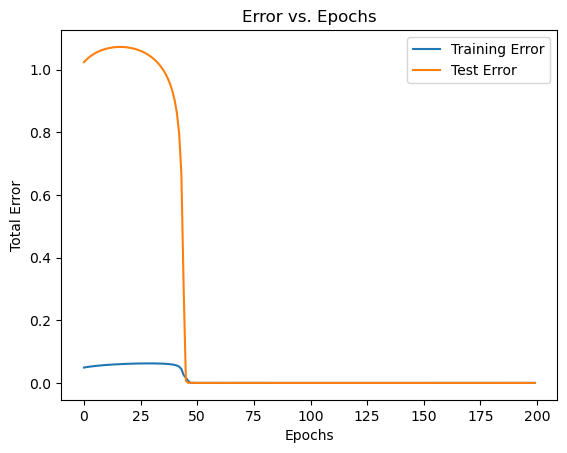

In [20]:
mlp4 = MultiLayerPerceptron(layer_sizes=[3, 30, 1], learning_rate=0.005, epochs=200)
mlp4.fit_with_graph_vs_test(vectores_train, y_train, vectores_test, y_test, min_error=0, batch_size=1)

A continuación se puede ver como varía la salida real de las 2 redes, una con batch size de 1 y otra con batch size de 40. Se puede ver que la red con batch size de 1 tiene una salida más suave y la red con batch size de 40 tiene una salida más brusca. Además la red con batch size de 1 pareciera alinearse apenas más con la recta de 45 grados que la red con batch size de 40.

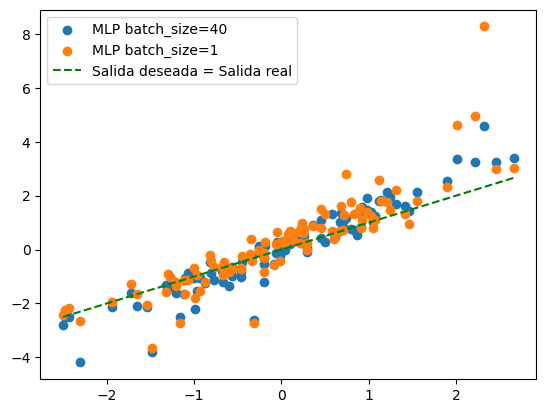

In [21]:
ypred3 = mlp3.predict(vectores_test)
ypred4 = mlp4.predict(vectores_test)

plt.scatter(y_test, ypred3, label=f'MLP batch_size=40')
plt.scatter(y_test, ypred4, label='MLP batch_size=1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', label='Salida deseada = Salida real')
plt.legend()
plt.show()

5. Siguiendo el trabajo de Hinton y Salakhutdinov (2006), entrene una máquina restringida
de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de
recontruccion durante el entrenamiento, y ejemplos de cada uno de los dígitos
reconstruidos.

Una máquina restringida de Boltzmann en definitiva es una red neuronal especial que está diseñada para reducir la dimensionalidad de los datos. En sí consiste 2 tipos de capas: La capa visible, que representa las características de los datos de entrada, y la capa oculta, que captura las dependencias y atrones en los datos de entrada. Esto, de su manera, es un encoder ya que reduce la dimensionalidad de los datos con un criterio no necesariamente claro para el usuario.

In [22]:
import scipy.io as sio
datos_train = sio.loadmat('RBM/datosTrain.mat')["data"]/255
datos_test = sio.loadmat('RBM/datosTest.mat')["data"]/255

In [23]:
class RBM:
    def __init__(self, visible_units, hidden_units, learning_rate=0.1, epochs=1000):
        self.visible_units = visible_units
        self.hidden_units = hidden_units
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(visible_units, hidden_units) * 0.1
        self.visible_bias = np.zeros(visible_units)
        self.hidden_bias = np.zeros(hidden_units)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def train(self, data):
        for epoch in range(self.epochs):
            for sample in data:
                # Fase positiva
                positive_hidden_probs = self.sigmoid(np.dot(sample, self.weights) + self.hidden_bias)
                positive_hidden_states = (positive_hidden_probs > np.random.rand(self.hidden_units)).astype(float)
                positive_associations = np.outer(sample, positive_hidden_probs)
                
                # Fase negativa
                negative_visible_probs = self.sigmoid(np.dot(positive_hidden_states, self.weights.T) + self.visible_bias)
                negative_hidden_probs = self.sigmoid(np.dot(negative_visible_probs, self.weights) + self.hidden_bias)
                negative_associations = np.outer(negative_visible_probs, negative_hidden_probs)
                
                # Actualización de pesos y sesgos
                self.weights += self.learning_rate * (positive_associations - negative_associations)
                self.visible_bias += self.learning_rate * (sample - negative_visible_probs)
                self.hidden_bias += self.learning_rate * (positive_hidden_probs - negative_hidden_probs)
            
            
            error = np.mean((data - self.reconstruct(data)) ** 2)
            ## print(f'Epoch {epoch + 1}/{self.epochs}, Reconstruction Error: {error}')
    
    def reconstruct(self, data):
        hidden_probs = self.sigmoid(np.dot(data, self.weights) + self.hidden_bias)
        visible_probs = self.sigmoid(np.dot(hidden_probs, self.weights.T) + self.visible_bias)
        return visible_probs

In [24]:
rbm = RBM(visible_units=datos_train.shape[1], hidden_units=120, learning_rate=0.1, epochs=100)
rbm.train(datos_train)
reconstructed_data = rbm.reconstruct(datos_test)

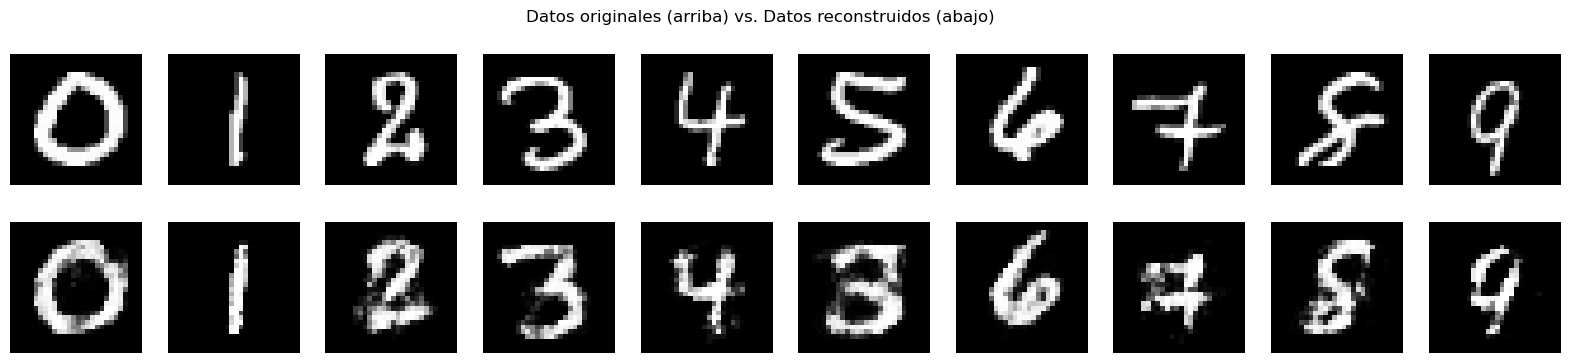

In [25]:
reconstructed_data = reconstructed_data.reshape(-1, 28, 28)
fig, axes = plt.subplots(2, 10, figsize=(20, 4))
for i in range(10):
    axes[1, i].imshow(reconstructed_data[i*20], cmap='gray')
    axes[1, i].axis('off')
    

    axes[0, i].imshow(datos_test[i * 20].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
fig.suptitle('Datos originales (arriba) vs. Datos reconstruidos (abajo)')
plt.show()

Se puede ver como al reconstruir la imagen de un dígito, la imagen reconstruida es muy similar a la imagen original aunque es un poco más borrosa que la imagen original. en algunos casos, se confunde de dígito y reconstruye en lugar de un 2 un 3 o genera algún objeto no distinguible como un dígito.

6. Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST.
¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos 90% en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más pequeño que puede conseguir con la misma exactitud?

Se definen 4 redes convolucionales distintas, cada una con una cantidad de capas convolucionales y de pooling menores que la previa. Se entrena cada red y se evalúa su exactitud en el conjunto de testeo a lo largo de 3 epochs. 

In [26]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#Cargo datos de MNIST ya normalizados
test_data = (torch.load('Conv/MNIST_test_data.pt', weights_only=True)/255)
train_data = (torch.load('Conv/MNIST_training_data.pt', weights_only=True)/255)
test_labels = torch.load('Conv/MNIST_test_labels.pt', weights_only=True)
train_labels = torch.load('Conv/MNIST_training_labels.pt', weights_only=True)

In [27]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0)  
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0) 
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)              
        self.fc1 = nn.Linear(64*5*5, 128)                                  
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))   
        x = self.maxpool(x)           
        x = self.relu(self.conv2(x))  
        x = self.maxpool(x)            
        x = x.view(-1, 64*5*5)       
        x = self.relu(self.fc1(x))    
        x = self.fc2(x)                
        return x

class CNN_pequeno(nn.Module):
    def __init__(self):
        super(CNN_pequeno, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(16*13*13, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = x.view(-1, 16*13*13)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_chiquitito(nn.Module):
    def __init__(self):
        super(CNN_chiquitito, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(8*13*13, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = x.view(-1, 8*13*13)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x    
    
class CNN_minimo(nn.Module):
    def __init__(self):
        super(CNN_minimo, self).__init__()
        self.conv1 = nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(1*13*13, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = x.view(-1, 1*13*13)
        x = self.fc1(x)
        return x

In [28]:
def train_model(model, train_data, train_labels, test_data, test_labels, epochs=3, batch_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())
    train_accuracies = []
    test_accuracies = []
    for epoch in range(epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for i in range(0, len(train_data), batch_size):
            inputs = train_data[i:i+batch_size]
            labels = train_labels[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        train_accuracies.append(correct_train / total_train)
        
        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            outputs = model(test_data)
            _, predicted = torch.max(outputs.data, 1)
            total_test += test_labels.size(0)
            correct_test += (predicted == test_labels).sum().item()
        test_accuracies.append(correct_test / total_test)
        
        print(f'Epoch {epoch + 1}/{epochs}, Train Accuracy: {train_accuracies[-1]}, Test Accuracy: {test_accuracies[-1]}')
    return train_accuracies, test_accuracies

In [29]:
models = [CNN(), CNN_pequeno(), CNN_chiquitito(), CNN_minimo()]

for model in models:
    model.to(device)

train_accuracies = []
test_accuracies = []

train_data = train_data.view(-1, 1, 28, 28)
test_data = test_data.view(-1, 1, 28, 28)

for model in models:
    train_acc, test_acc = train_model(model, train_data, train_labels, test_data, test_labels, epochs=3)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)



Epoch 1/3, Train Accuracy: 0.9419166666666666, Test Accuracy: 0.9752
Epoch 2/3, Train Accuracy: 0.9822666666666666, Test Accuracy: 0.9856
Epoch 3/3, Train Accuracy: 0.98845, Test Accuracy: 0.9882
Epoch 1/3, Train Accuracy: 0.9149666666666667, Test Accuracy: 0.9619
Epoch 2/3, Train Accuracy: 0.9705166666666667, Test Accuracy: 0.9739
Epoch 3/3, Train Accuracy: 0.9806833333333334, Test Accuracy: 0.979
Epoch 1/3, Train Accuracy: 0.90725, Test Accuracy: 0.9433
Epoch 2/3, Train Accuracy: 0.9641666666666666, Test Accuracy: 0.9707
Epoch 3/3, Train Accuracy: 0.9761166666666666, Test Accuracy: 0.9774
Epoch 1/3, Train Accuracy: 0.7768166666666667, Test Accuracy: 0.8805
Epoch 2/3, Train Accuracy: 0.8889166666666667, Test Accuracy: 0.9029
Epoch 3/3, Train Accuracy: 0.9033166666666667, Test Accuracy: 0.9127


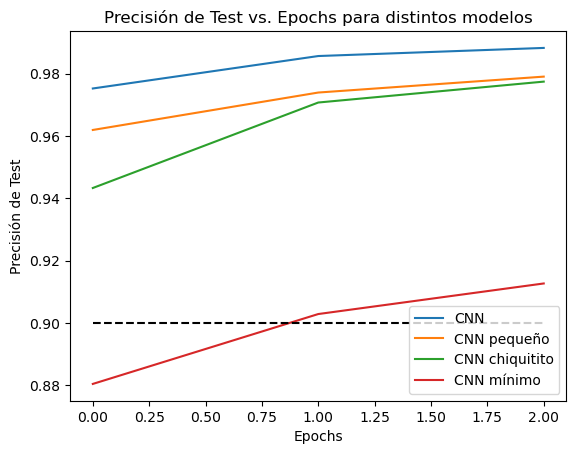

In [30]:
plt.plot(test_accuracies[0], label='CNN')
plt.plot(test_accuracies[1], label='CNN pequeño')
plt.plot(test_accuracies[2], label='CNN chiquitito')
plt.plot(test_accuracies[3], label='CNN mínimo')
plt.hlines(0.9, 0, 2, colors='k', linestyles='dashed')

plt.xlabel('Epochs')
plt.ylabel('Precisión de Test')
plt.title('Precisión de Test vs. Epochs para distintos modelos')
plt.legend()
plt.show()

Se puede ver que incluso la red convolucional más sencilla en pocas epochs ya tiene una exactitud mayor al 90% en el conjunto de testeo lo cual aclara que la potencia de este tipo de redes es muy grande. Incluso siendo una red muy sencilla, con pocas capas y pocas neuronas, puede tener una exactitud muy alta.

A continuación, se declaran 3 tipos de redes neuronales multicapa distintas, cada una con una cantidad de capas y neuronas menores que la previa. Se entrena cada red y se evalúa su exactitud en el conjunto de testeo a lo largo de 3 epochs.

In [31]:
class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 200)
        self.fc3 = nn.Linear(200, 400)
        self.fc4 = nn.Linear(400, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x
class MLP_pequeno (nn.Module):
    def __init__(self):
        super(MLP_pequeno, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
class MLP_chiquitito (nn.Module):    
    def __init__(self):
        super(MLP_chiquitito, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        return x


In [32]:
models_mlp = [MLP(), MLP_pequeno(), MLP_chiquitito()]

for model in models:
    model.to(device)

train_accuracies_mlp = []
test_accuracies_mlp = []

for model in models_mlp:
    train_acc, test_acc = train_model(model, train_data, train_labels, test_data, test_labels, epochs=3)
    train_accuracies_mlp.append(train_acc)
    test_accuracies_mlp.append(test_acc)

Epoch 1/3, Train Accuracy: 0.9091166666666667, Test Accuracy: 0.9533
Epoch 2/3, Train Accuracy: 0.96375, Test Accuracy: 0.9686
Epoch 3/3, Train Accuracy: 0.9746666666666667, Test Accuracy: 0.965
Epoch 1/3, Train Accuracy: 0.90555, Test Accuracy: 0.9404
Epoch 2/3, Train Accuracy: 0.9509666666666666, Test Accuracy: 0.9567
Epoch 3/3, Train Accuracy: 0.9658, Test Accuracy: 0.9628
Epoch 1/3, Train Accuracy: 0.8666333333333334, Test Accuracy: 0.9094
Epoch 2/3, Train Accuracy: 0.9093333333333333, Test Accuracy: 0.9178
Epoch 3/3, Train Accuracy: 0.9167666666666666, Test Accuracy: 0.9197


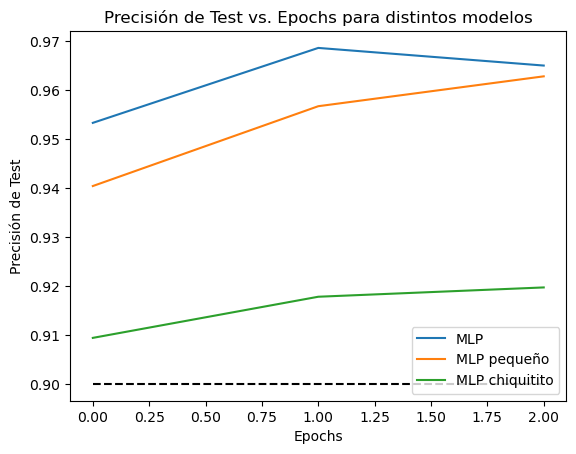

In [33]:
plt.plot(test_accuracies_mlp[0], label='MLP')
plt.plot(test_accuracies_mlp[1], label='MLP pequeño')
plt.plot(test_accuracies_mlp[2], label='MLP chiquitito')

plt.hlines(0.9, 0, 2, colors='k', linestyles='dashed')

plt.xlabel('Epochs')
plt.ylabel('Precisión de Test')
plt.title('Precisión de Test vs. Epochs para distintos modelos')
plt.legend()
plt.show()

Observando el gráfico de precisión en función a las epochs, se puede ver que el comportamiento es muy similar al de las redes convolucionales. La red más sencilla ya tiene una precisión mayor al 90% en el conjunto de testeo en pocas epochs. Aún así, la tendencia de la red convolucional es mejor que la de la red multicapa, ya que la red convolucional tiene una precisión mayor en todas las epochs.

7. Entrene un autoencoder para obtener una representación de baja dimensionalidad de las
imágenes de MNIST. Use dichas representaciones para entrenar un perceptrón
multicapa como clasificador. ¿Cuál es el tiempo de entrenamiento y la exactitud del
clasificador obtenido cuando parte de la representación del autoencoder, en
comparación con lo obtenido usando las imágenes originales?

El autoencoder no viene a ser más que una red neuronal que tiene como objetivo aprender a copiar su entrada en su salida. Para eso se le da un dato de dimensión alta, se lo reduce a una dimensión baja y luego se lo vuelve a expandir a la dimensión original. En este caso se le da una imagen de 28x28 y se la reduce a una dimensión de 20 y luego se la expande a 28x28. 

In [34]:
lower_dim = 20

class AutoEncoder (nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, lower_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(lower_dim, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [35]:
test_data = (torch.load('Conv/MNIST_test_data.pt', weights_only=True)/255).to(device)
train_data = (torch.load('Conv/MNIST_training_data.pt', weights_only=True)/255).to(device)
test_labels = torch.load('Conv/MNIST_test_labels.pt', weights_only=True).to(device)
train_labels = torch.load('Conv/MNIST_training_labels.pt', weights_only=True).to(device)

A continuación, se puede ver como el autoencoder aprende en 10 epochs hasta minimizar el error de reconstrucción. Esto es particularmente útil para poder enviar información en una menor dimensión y luego entrenar a una red multicapa para clasificar los datos.

In [36]:
autoencoder = AutoEncoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

num_epochs = 10
batch_size = 64

train_data_flat = train_data.view(-1, 28*28)
test_data_flat = test_data.view(-1, 28*28)

for epoch in range(num_epochs):
    autoencoder.train()
    for i in range(0, len(train_data_flat), batch_size):
        inputs = train_data_flat[i:i+batch_size]
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.0518
Epoch [2/10], Loss: 0.0373
Epoch [3/10], Loss: 0.0316
Epoch [4/10], Loss: 0.0287
Epoch [5/10], Loss: 0.0275
Epoch [6/10], Loss: 0.0264
Epoch [7/10], Loss: 0.0251
Epoch [8/10], Loss: 0.0243
Epoch [9/10], Loss: 0.0234
Epoch [10/10], Loss: 0.0230


Se define esta función para poder entrenar un perceptrón multicapa con la representación de baja dimensionalidad de las imágenes de MNIST. Se entrena el perceptrón multicapa y se evalúa su exactitud en el conjunto de testeo.

In [37]:
from torch.utils.data import DataLoader, TensorDataset

def get_encoded_data(autoencoder, dataloader):
    encoded_outputs = []
    labels = []
    with torch.no_grad():
        for data in dataloader:
            img, label = data
            img = img.view(img.size(0), -1)
            encoded = autoencoder.encoder(img)
            encoded_outputs.append(encoded)
            labels.append(label)
    encoded_outputs = torch.cat(encoded_outputs)
    labels = torch.cat(labels)
    return encoded_outputs, labels

# Create DataLoader for train and test data
train_dataset = TensorDataset(train_data_flat, train_labels)
test_dataset = TensorDataset(test_data_flat, test_labels)
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get encoded data
encoded_train_data, train_labels = get_encoded_data(autoencoder, trainloader)
encoded_test_data, test_labels = get_encoded_data(autoencoder, testloader)

print(encoded_train_data.shape)
print(encoded_test_data.shape)

torch.Size([60000, 20])
torch.Size([10000, 20])


In [38]:
def train(model, train_data, train_labels, criterion, optimizer, num_epochs=3, batch_size=64):
    for epoch in range(num_epochs):
        model.train()
        for i in range(0, len(train_data), batch_size):
            inputs = train_data[i:i+batch_size]
            labels = train_labels[i:i+batch_size]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

def evaluate_model(model, test_data, test_labels):
    model.eval()
    with torch.no_grad():
        outputs = model(test_data)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == test_labels).sum().item()
        total = test_labels.size(0)     
        return correct / total


In [48]:
import time

modelo_solo = MLP()

modelo_solo.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_autoencoder = torch.optim.Adam(modelo_solo.parameters())
optimizer_solo = torch.optim.Adam(modelo_solo.parameters())


tiempo_inicio_solo = time.time()
train(modelo_solo, train_data_flat, train_labels, criterion, optimizer_solo, num_epochs=3)
tiempo_duracion_solo = time.time() - tiempo_inicio_solo


Epoch 1/3, Loss: 0.03426666930317879
Epoch 2/3, Loss: 0.028750954195857048
Epoch 3/3, Loss: 0.014175929129123688


In [40]:
class MLP_input_AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(lower_dim, 12)  # Input size should match the encoded data size
        self.fc2 = nn.Linear(12, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, lower_dim)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [46]:
modelo_autoencoder = MLP_input_AutoEncoder()
modelo_autoencoder.to(device)
optimizer_autoencoder = torch.optim.Adam(modelo_autoencoder.parameters())
criterion = nn.CrossEntropyLoss()

tiempo_inicio_encoder = time.time()
train(modelo_autoencoder, encoded_train_data, train_labels, criterion, optimizer_autoencoder, num_epochs=3)
tiempo_duracion_encoder = time.time() - tiempo_inicio_encoder

Epoch 1/3, Loss: 0.14755454659461975
Epoch 2/3, Loss: 0.1781909465789795
Epoch 3/3, Loss: 0.16856873035430908


In [49]:
print('Precisión MLP + autoencoder: ', round(evaluate_model(modelo_autoencoder, encoded_test_data, test_labels), 3))
print(f'Tiempo de entrenamiento MLP + autoencoder: {round(tiempo_duracion_encoder, 3)} segundos')
print('Precisión MLP: ',evaluate_model(modelo_solo, test_data_flat, test_labels))
print(f'Tiempo de entrenamiento MLP: {round(tiempo_duracion_solo, 3)} segundos')

Precisión MLP + autoencoder:  0.904
Tiempo de entrenamiento MLP + autoencoder: 13.215 segundos
Precisión MLP:  0.9596
Tiempo de entrenamiento MLP: 23.666 segundos


Se puede ver que la precisión de la red multicapa entrenada con la representación de baja dimensionalidad de las imágenes de MNIST es muy similar aunque menor a la precisión de la red multicapa entrenada con las imágenes originales. Esto es porque la representación de baja dimensionalidad es suficiente para poder clasificar las imágenes de MNIST. En cambio la diferencia yace en el tiempo de entrenamiento, que es menor en el caso de la representación de baja dimensionalidad.